In [1]:
%%capture
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local

#1. Загрузка всех геномов
- Один референсный и два генома арабидопсиса (одни из немногих на которые были аннотации)

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/735/GCF_000001735.4_TAIR10.1/GCF_000001735.4_TAIR10.1_genomic.fna.gz
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001/651/475/GCA_001651475.1_Ler_Assembly/GCA_001651475.1_Ler_Assembly_genomic.fna.gz
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/904/420/315/GCA_904420315.1_AT9943.Cdm-0.scaffold/GCA_904420315.1_AT9943.Cdm-0.scaffold_genomic.fna.gz

--2024-10-30 15:29:11--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/735/GCF_000001735.4_TAIR10.1/GCF_000001735.4_TAIR10.1_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 130.14.250.13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37482399 (36M) [application/x-gzip]
Saving to: ‘GCF_000001735.4_TAIR10.1_genomic.fna.gz’

GCF_000001735.4_TAI 100%[===================>]  35.75M  20.9MB/s    in 1.7s    

2024-10-30 15:29:13 (20.9 MB/s) - ‘GCF_000001735.4_TAIR10.1_genomic.fna.gz’ saved [37482399/37482399]

--2024-10-30 15:29:13--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001/651/475/GCA_001651475.1_Ler_Assembly/GCA_001651475.1_Ler_Assembly_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 130.14.250.13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.2

In [ ]:
!gunzip GCF_000001735.4_TAIR10.1_genomic.fna.gz
!gunzip GCA_001651475.1_Ler_Assembly_genomic.fna.gz
!gunzip GCA_904420315.1_AT9943.Cdm-0.scaffold_genomic.fna.gz

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/735/GCF_000001735.4_TAIR10.1/GCF_000001735.4_TAIR10.1_genomic.gff.gz
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001/651/475/GCA_001651475.1_Ler_Assembly/GCA_001651475.1_Ler_Assembly_genomic.gff.gz
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/904/420/315/GCA_904420315.1_AT9943.Cdm-0.scaffold/GCA_904420315.1_AT9943.Cdm-0.scaffold_genomic.gff.gz


--2024-10-30 15:29:26--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/735/GCF_000001735.4_TAIR10.1/GCF_000001735.4_TAIR10.1_genomic.gff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 130.14.250.13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22213077 (21M) [application/x-gzip]
Saving to: ‘GCF_000001735.4_TAIR10.1_genomic.gff.gz’

GCF_000001735.4_TAI 100%[===================>]  21.18M  9.54MB/s    in 2.2s    

2024-10-30 15:29:29 (9.54 MB/s) - ‘GCF_000001735.4_TAIR10.1_genomic.gff.gz’ saved [22213077/22213077]

--2024-10-30 15:29:29--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001/651/475/GCA_001651475.1_Ler_Assembly/GCA_001651475.1_Ler_Assembly_genomic.gff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 130.14.250.13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.2

In [ ]:
!gunzip GCF_000001735.4_TAIR10.1_genomic.gff.gz
!gunzip GCA_904420315.1_AT9943.Cdm-0.scaffold_genomic.gff.gz
!gunzip GCA_001651475.1_Ler_Assembly_genomic.gff.gz

# 1.1 Извлекаем хромосому
- Извлекаем хромосому 1 и хромосому 4, пока думаю над какой буду работать, но хромосома 4, меньше поэтому начнем с нее. (в начале хотела работать с олной хромосомой, но попробуем с полным геномом, тк он не ососбо большой).

In [ ]:
!sed -n '/^>.*chromosome 4/,/^>/p' GCF_000001735.4_TAIR10.1_genomic.fna | sed '$d' > chr4.fna

In [ ]:
!sed -n '/^>.*chromosome 1/,/^>/p' GCF_000001735.4_TAIR10.1_genomic.fna | sed '$d' > chr1.fna

# 2. Преобразуем файлы

In [ ]:
!conda create -n agat

Channels:
 - defaults
Platform: linux-64
Solving environment: - done

## Package Plan ##

  environment location: /usr/local/envs/agat



Proceed ([y]/n)? y

Preparing transaction: | done
Verifying transaction: - done
Executing transaction: | done
#
# To activate this environment, use
#
#     $ conda activate agat
#
# To deactivate an active environment, use
#
#     $ conda deactivate



In [ ]:
!source activate agat && conda install agat -c conda-forge -c bioconda

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: - \ | / done

## Package Plan ##

  environment location: /usr/local/envs/agat

  added / updated specs:
    - agat


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    _r-mutex-1.0.1             |      anacondar_1           3 KB  conda-forge
    agat-1.4.1                 | pl5321hdfd78af_0         454 KB  bioconda
    binutils_impl_linux-64-2.43|       h4bf12b8_2         5.4 MB  conda-forge
    bwidget-1.9.14             |       ha770c72_1         120 KB  conda-forge
    bzip2-1.0.8                |       h4bc722e_7         247 KB  conda-forge
    c-ares-1.34.2              |       heb4867d_0         201 KB  conda-forge
    ca-certificates-

## 2.1 gff -> bed

In [ ]:
%%capture
!source activate agat && agat_convert_sp_gff2bed.pl --gff GCF_000001735.4_TAIR10.1_genomic.gff -o tair10.bed

In [ ]:
%%capture
!source activate agat && agat_convert_sp_gff2bed.pl --gff GCA_001651475.1_Ler_Assembly_genomic.gff -o ler.bed

In [ ]:
%%capture
!source activate agat && agat_convert_sp_gff2bed.pl --gff GCA_904420315.1_AT9943.Cdm-0.scaffold_genomic.gff -o cdm.bed

## 2.2 Извлечение CDS

In [ ]:
%%capture
!source activate agat && agat_sp_extract_sequences.pl -g GCF_000001735.4_TAIR10.1_genomic.gff -f GCF_000001735.4_TAIR10.1_genomic.fna -o tair10.cds

In [ ]:
%%capture
!source activate agat && agat_sp_extract_sequences.pl -g GCA_001651475.1_Ler_Assembly_genomic.gff -f GCA_001651475.1_Ler_Assembly_genomic.fna -o ler.cds

In [ ]:
%%capture
!source activate agat && agat_sp_extract_sequences.pl -g GCA_904420315.1_AT9943.Cdm-0.scaffold_genomic.gff -f GCA_904420315.1_AT9943.Cdm-0.scaffold_genomic.fna -o cdm.cds

# 3. Строим графики

In [2]:
!conda create -n jcvi

Channels:
 - defaults
Platform: linux-64
Solving environment: \ done

## Package Plan ##

  environment location: /usr/local/envs/jcvi



Proceed ([y]/n)? y

Preparing transaction: / done
Verifying transaction: \ done
Executing transaction: / done
#
# To activate this environment, use
#
#     $ conda activate jcvi
#
# To deactivate an active environment, use
#
#     $ conda deactivate



In [3]:
!source activate jcvi && conda install jcvi -c conda-forge -c bioconda

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local/envs/jcvi

  added / updated specs:
    - jcvi


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    _r-mutex-1.0.1             |      anacondar_1           3 KB  conda-forge
    alsa-lib-1.2.12            |       h4ab18f5_0         543 KB  conda-forge
    argcomplete-3.5.1          |     pyhd8ed1ab_0          40 KB  conda-forge
    argh-0.31.3                |     pyhd8ed1ab_0          44 KB  conda-forge
    atk-1.0-2.38.0             |       h04ea711_2         348 KB  conda-forge
    attr-2.5.1                 |       h166bdaf_1          69 KB  conda-forge
    b

In [4]:
!source activate jcvi && conda install last -c conda-forge -c bioconda

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: \ | / - \ | / - done

# All requested packages already installed.



In [ ]:
# Установка jcvi через pip (эта команда не работает и каждый раз сносит мой гугл коллаб)
# !pip install jcvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.0/784.0 kB 16.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 104.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached more_itertools-10.5.0-py3-none-any.whl.metadata (36 kB)
  Using cached natsort-8.4.0-py3-none-any.whl.metadata (21 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 68.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached webcolors-24.8.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached filelock-3.16

## 3.1 Графики:

In [ ]:
!source activate jcvi && python -m jcvi.compara.catalog ortholog cdm tair10 --cscore=.99 --no_strip_names

[10/30/24 20:54:57] DEBUG    lastdb tair10 tair10.cds                                   ]8;id=430745;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=491798;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#1191\1191]8;;\
[10/30/24 20:56:33] DEBUG    lastal -u 0 -i3G -f BlastTab -P 2 tair10 cdm.cds           ]8;id=660533;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=331208;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#1191\1191]8;;\
                             >./cdm.tair10.last                                                     
[10/30/24 20:59:22] DEBUG    Assuming --qbed=cdm.bed --sbed=tair10.bed                ]8;id=843294;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py\synteny.py]8;;\:]8;id=445626;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py#390

- на выход получаем pdf файл с графиком cdm.tair10.pdf:

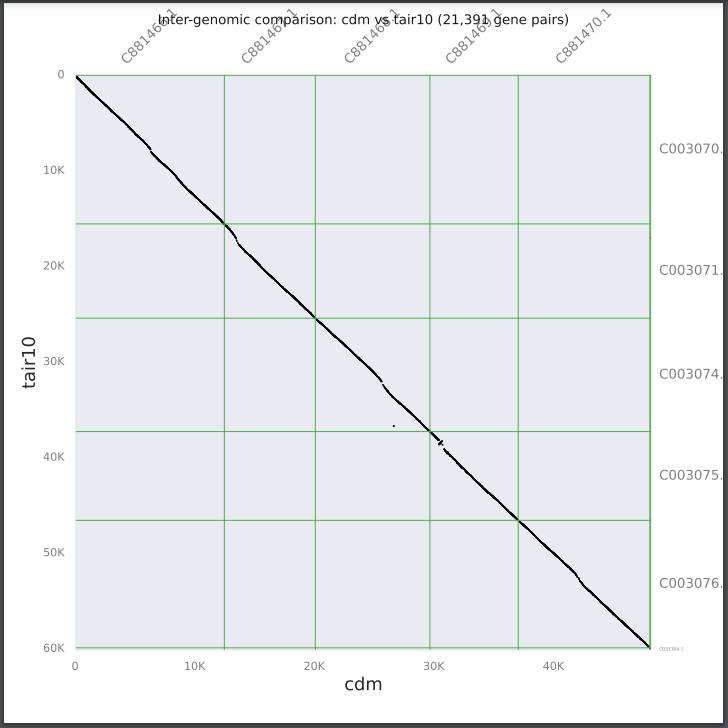

In [ ]:
!source activate jcvi && python -m jcvi.compara.catalog ortholog ler tair10 --cscore=.99 --no_strip_names

[10/30/24 20:59:51] DEBUG    File `tair10.prj` found. Computation skipped.              ]8;id=8016;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=378402;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#1382\1382]8;;\
                    DEBUG    lastal -u 0 -i3G -f BlastTab -P 2 tair10 ler.cds           ]8;id=699844;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=846641;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#1191\1191]8;;\
                             >./ler.tair10.last                                                     
[10/30/24 21:03:12] DEBUG    Assuming --qbed=ler.bed --sbed=tair10.bed                ]8;id=635256;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py\synteny.py]8;;\:]8;id=587681;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py#390\3

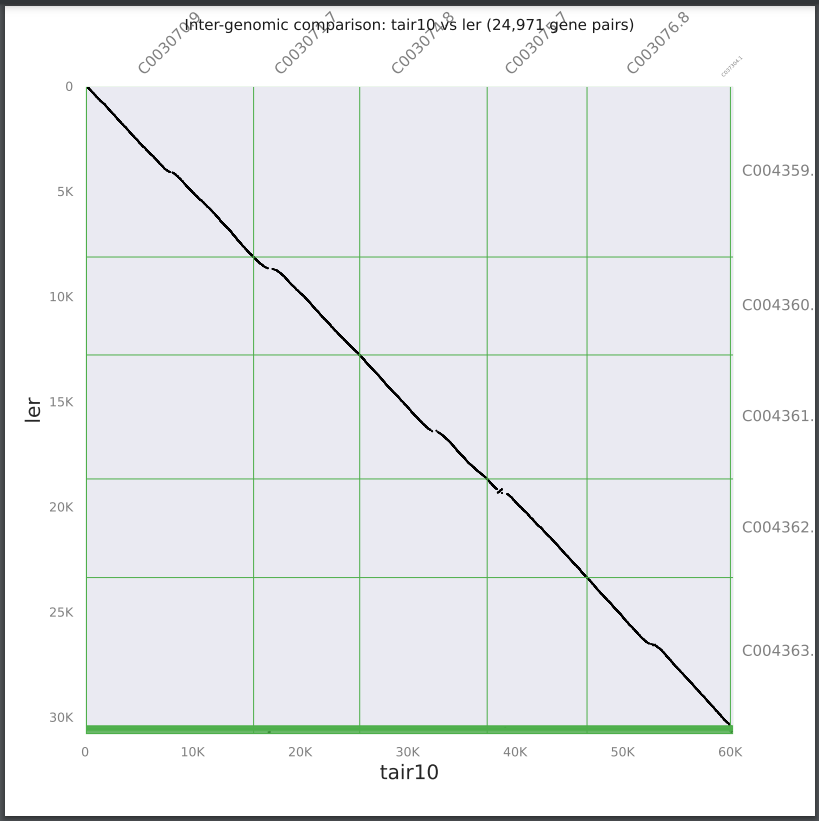

## 3.1 Гистограммы:

In [ ]:
!source activate jcvi && python -m jcvi.compara.synteny depth --histogram cdm.tair10.anchors

[10/30/24 15:48:12] DEBUG    Assuming --qbed=cdm.bed --sbed=tair10.bed                ]8;id=338863;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py\synteny.py]8;;\:]8;id=567186;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py#390\390]8;;\
                    DEBUG    Load file `cdm.bed`                                          ]8;id=428810;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=802321;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/30/24 15:48:13] DEBUG    Load file `tair10.bed`                                       ]8;id=33546;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=196279;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/30/24 15:48:15] DEBUG    Load file `cdm.tair10.anchors`                       

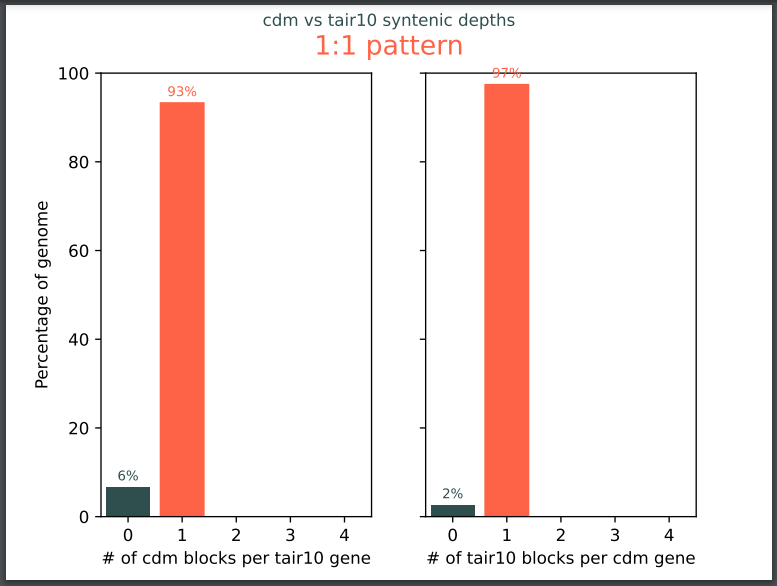

In [ ]:
!source activate jcvi && python -m jcvi.compara.synteny depth --histogram tair10.ler.anchors

[10/30/24 15:54:26] DEBUG    Assuming --qbed=tair10.bed --sbed=ler.bed                ]8;id=95206;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py\synteny.py]8;;\:]8;id=836875;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py#390\390]8;;\
                    DEBUG    Load file `tair10.bed`                                       ]8;id=646092;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=568866;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/30/24 15:54:27] DEBUG    Load file `ler.bed`                                          ]8;id=931818;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=7949;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/30/24 15:54:28] DEBUG    Load file `tair10.ler.anchors`                         

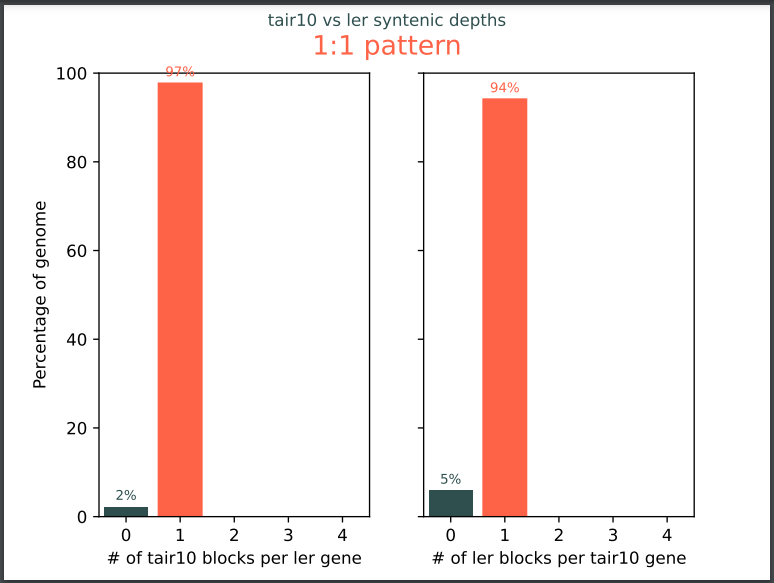

# 4. MCScanX


In [ ]:
!grep "^>" GCF_000001735.4_TAIR10.1_genomic.fna

>NC_003070.9 Arabidopsis thaliana chromosome 1 sequence
>NC_003071.7 Arabidopsis thaliana chromosome 2, partial sequence
>NC_003074.8 Arabidopsis thaliana chromosome 3, partial sequence
>NC_003075.7 Arabidopsis thaliana chromosome 4, partial sequence
>NC_003076.8 Arabidopsis thaliana chromosome 5, partial sequence
>NC_037304.1 Arabidopsis thaliana ecotype Col-0 mitochondrion, complete genome
>NC_000932.1 Arabidopsis thaliana chloroplast, complete genome


In [ ]:
!grep "^>" GCA_001651475.1_Ler_Assembly_genomic.fna

>CM004359.1 Arabidopsis thaliana ecotype Landsberg erecta chromosome 1, whole genome shotgun sequence
>CM004360.1 Arabidopsis thaliana ecotype Landsberg erecta chromosome 2, whole genome shotgun sequence
>CM004361.1 Arabidopsis thaliana ecotype Landsberg erecta chromosome 3, whole genome shotgun sequence
>CM004362.1 Arabidopsis thaliana ecotype Landsberg erecta chromosome 4, whole genome shotgun sequence
>CM004363.1 Arabidopsis thaliana ecotype Landsberg erecta chromosome 5, whole genome shotgun sequence
>LUHQ01000006.1 Arabidopsis thaliana scaffold15_Contig142, whole genome shotgun sequence
>LUHQ01000007.1 Arabidopsis thaliana scaffold15_Contig624, whole genome shotgun sequence
>LUHQ01000008.1 Arabidopsis thaliana scaffold18_size294915, whole genome shotgun sequence
>LUHQ01000009.1 Arabidopsis thaliana scaffold24_size307384, whole genome shotgun sequence
>LUHQ01000010.1 Arabidopsis thaliana scaffold26_size238942, whole genome shotgun sequence
>LUHQ01000011.1 Arabidopsis thaliana scaff

In [ ]:
!grep "^>" GCA_904420315.1_AT9943.Cdm-0.scaffold_genomic.fna

>LR881466.1 Arabidopsis thaliana genome assembly, chromosome: 1
>LR881467.1 Arabidopsis thaliana genome assembly, chromosome: 2
>LR881468.1 Arabidopsis thaliana genome assembly, chromosome: 3
>LR881469.1 Arabidopsis thaliana genome assembly, chromosome: 4
>LR881470.1 Arabidopsis thaliana genome assembly, chromosome: 5
>LR881472.1 Arabidopsis thaliana genome assembly, organelle: mitochondrion
>LR881471.1 Arabidopsis thaliana genome assembly, organelle: plastid:chloroplast


In [5]:
!source activate jcvi && python -m jcvi.graphics.karyotype seqids layout

[10/31/24 17:09:22] INFO     `latex` not found. latex use is disabled.                   ]8;id=349057;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=591203;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#614\614]8;;\
                    INFO     `lp` not found. latex use is disabled.                      ]8;id=534075;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=487592;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#616\616]8;;\
                    INFO     Set text.usetex=False. Font styles may be inconsistent.     ]8;id=98877;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py\base.py]8;;\:]8;id=922834;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py#453\453]8;;\
                    DEBUG    Load file `layout`                                           ]8;id

# 4.1 Графики и гистограммы 2.
- последний график все не получался в коллабе, поэтому переделала в командной строке, но проблема была в том, что не получалось именно для 3 образцов сразу, поэтому попробовала отдельно для на cdm и референс (tair10) и ler на референс (tair10).

- перед эти создали cdm.tair10.anchors.simple:

```
python -m jcvi.compara.synteny screen --minspan=30 --simple cdm.tair10.anchors cdm.tair10.anchors.new
```
создаем файлы seqids1 layout1:
```
LR881466.1,LR881467.1,LR881468.1,LR881469.1,LR881470.1,LR881471.1,LR881472.1
NC_000932.1,NC_003070.9,NC_003071.7,NC_003074.8,NC_003075.7,NC_003076.8,NC_037304.1
```
 - layout1:
```
 y, xstart, xend, rotation, color, label, va,  bed
 .6,     .1,    .8,       0,      , cdm, top, cdm.bed
 .4,     .1,    .8,       0,      , tair10, top, tair10.bed
# edges
e, 0, 1, cdm.tair10.anchors.simple
```


```
python -m jcvi.graphics.karyotype seqids1 layout1
```


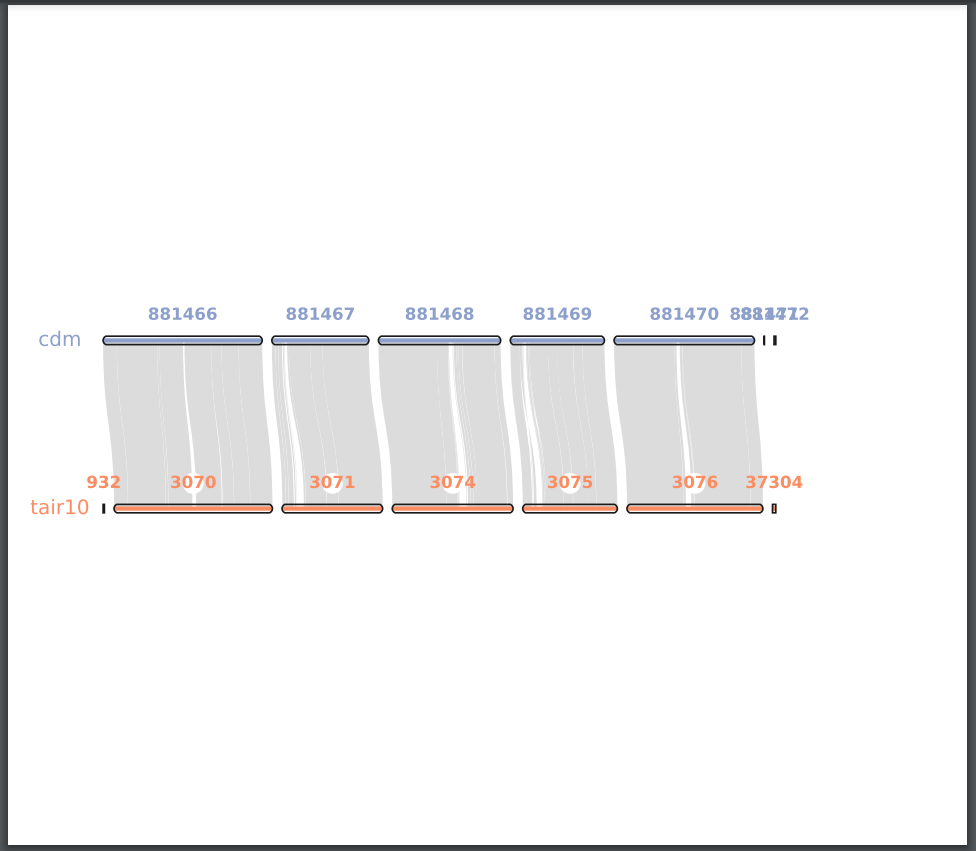


- ler и референс (tair10).
- seqids2

```
CM004359.1,CM004360.1,CM004361.1,CM004362.1,CM004363.1
NC_000932.1,NC_003070.9,NC_003071.7,NC_003074.8,NC_003075.7,NC_003076.8,NC_037304.1
```
- layout2:
```
# y, xstart, xend, rotation, color, label, va, bed
.6,     .1,    .8,       0,      , ler, top, ler.bed
.4,     .1,    .8,       0,      , tair10, top, tair10.bed
# edges
e, 0, 1, tair10.ler.anchors.simple
```
```
python -m jcvi.compara.synteny screen --minspan=30 --simple tair10.ler.anchors tair10.ler.anchors.new
```

```
python -m jcvi.graphics.karyotype seqids1 layout1
```

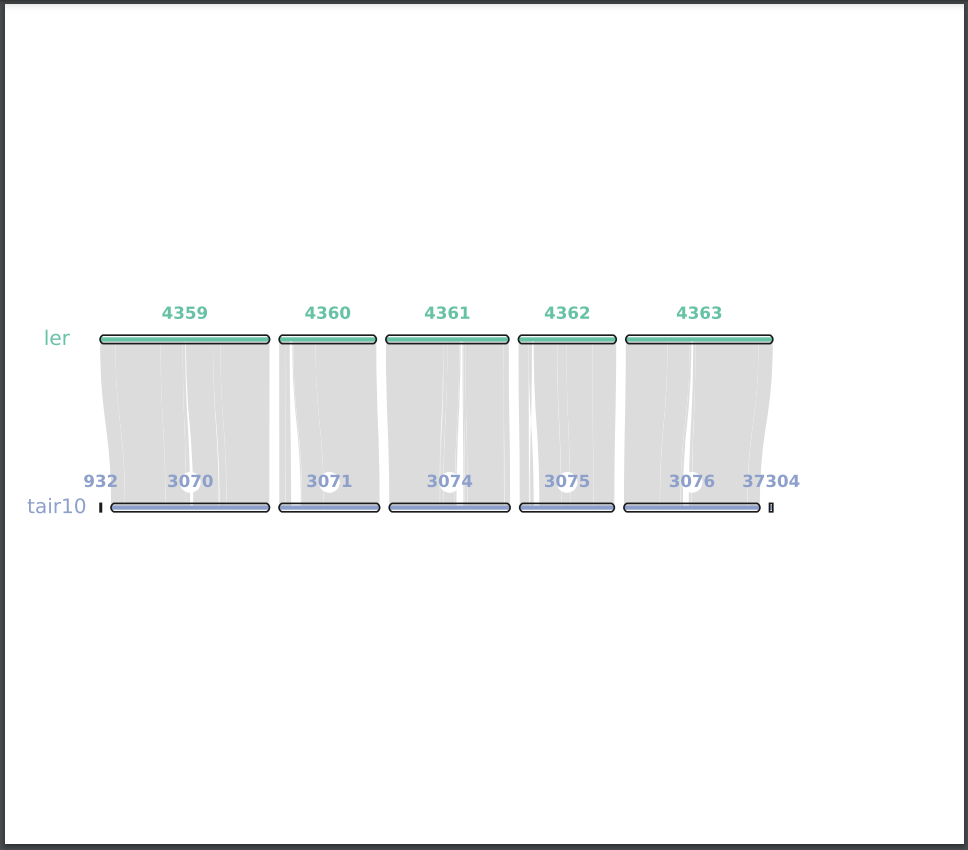